This Notebook has been created by PALISSON Antoine

In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split

### Datasets

In [2]:
from sklearn.datasets import fetch_openml

# Fasion dataset
fashion_mnist = fetch_openml("Fashion-MNIST", version=1)
fashion_mnist = pd.concat([fashion_mnist['data'], fashion_mnist['target']], axis=1)
fashion_mnist['class'] = fashion_mnist['class'].map({"0" : "T-shirt/top",
                                                     "1" : "Trouser",
                                                     "2" : "Pullover",
                                                     "3" : "Dress",
                                                     "4" : "Coat",
                                                     "5" : "Sandal",
                                                     "6" : "Shirt",
                                                     "7" : "Sneaker",
                                                     "8" : "Bag",
                                                     "9" : "Ankle boot"})

# Fashion classification

**Fashion MNIST** is a popular benchmark dataset for image classification in the field of machine learning. It consists of a set of 70,000 grayscale images of size 28x28 pixels, representing 10 different categories of clothing and accessories, such as t-shirts, trousers, dresses, and shoes.

Fashion MNIST is widely used in research and education as a replacement for the traditional MNIST dataset of handwritten digits, which has become too easy for modern machine learning algorithms to classify accurately. Fashion MNIST presents a more challenging task for image classification, while still being relatively small and easy to work with.

Fashion MNIST was created by a team of researchers from Zalando, and it has been used as a benchmark dataset for evaluating the performance of various machine learning models, including deep neural networks. The dataset can be downloaded from the official Fashion MNIST website, along with code examples for working with the data in various programming languages.

**<font color='blue'>1.a. Show the fashion mnist first rows.**

In [3]:
fashion_mnist.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.00000,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.00000,70000.000000,70000.000000
mean,0.000771,0.006414,0.034486,0.098886,0.247843,0.408714,0.802900,2.204386,5.634900,14.41000,...,34.582314,23.288643,16.611600,17.823371,22.887986,17.968129,8.524043,2.75140,0.836529,0.072914
std,0.087339,0.296605,1.200882,2.458872,4.408110,5.842288,8.186472,14.117208,23.698865,38.18827,...,57.584612,48.935288,42.075046,43.901606,51.853192,45.231601,29.527900,17.38577,9.258426,2.129924
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,57.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,16.000000,45.000000,218.000000,185.000000,227.000000,230.000000,224.000000,225.000000,254.000000,255.00000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,170.000000


To show an image stored in a DataFrame in Python:


1.   **Reshape the data**: Reshaping the data involves changing the dimensions of an array without changing the underlying data. To reshape the data, you can use the **`reshape()`** function in NumPy. For example, if the original image dimensions are 28x28 pixels, we can reshape a one-dimensional array image_data of length 784 into a two-dimensional array image_array of shape (28, 28). [Documentation](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html).
```
arr_reshaped = np.reshape(arr, (28,28))
```


2.   **Display the image**: To display the data, you can use the **`imshow()`** function in NumPy. You can play with the image color using the `cmap` parameter that can be a string representing a named colormap (such as 'gray', 'binary' or 'viridis'). [Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html).
```
import matplotlib.pyplot as plt
plt.imshow(arr_reshaped, ...)
```

**<font color='blue'>1.b. Display some of the images of the dataset.**

(-0.5, 27.5, 27.5, -0.5)

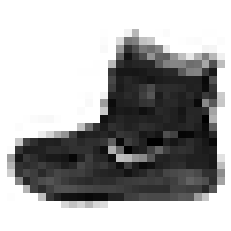

In [4]:
arr = np.array(fashion_mnist.iloc[0, :-1]).astype(float)
# type(arr)
arr_reshaped = np.reshape(arr, (28, 28))

plt.imshow(arr_reshaped, cmap='binary')
plt.axis('off')

(-0.5, 27.5, 27.5, -0.5)

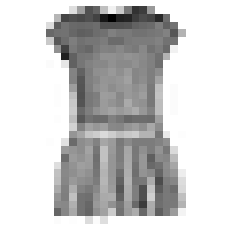

In [5]:
arr = np.array(fashion_mnist.iloc[3, :-1]).astype(float)
# type(arr)
arr_reshaped = np.reshape(arr, (28, 28))

plt.imshow(arr_reshaped, cmap='binary')
plt.axis('off')

**<font color='blue'>2.a. Separate the features from the labels.**

In [6]:
X = fashion_mnist.iloc[:, :-1]
y = fashion_mnist.iloc[:, -1]

**<font color='blue'>2.b. Create a training, a validation and a testing set.**

In [7]:
#Split train and val-test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)

#Split validation and test sets.
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=1/3, random_state=42, stratify=y_test)

An image is generally composed of **pixels** which are integers that range from 0 to 255.

Pixels are generally **normalized to a common scale**, such as between 0 and 1, to ensure that the values are comparable and have similar ranges. This can be done by dividing the pixel values by the maximum pixel value (e.g. 255 for 8-bit grayscale images).

**<font color='blue'>3.a. Preprocess the features by dividing the features by 255.**

In [8]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

In [9]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
22317,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.333333,0.270588,0.529412,0.756863,0.356863,0.000000,0.000000,0.0,0.0,0.0
18502,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
43477,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.137255,0.352941,0.254902,0.000000,0.0,0.0,0.0
41125,0.0,0.0,0.0,0.000000,0.0,0.003922,0.000000,0.0,0.0,0.152941,...,0.015686,0.000000,0.270588,0.674510,0.462745,0.000000,0.000000,0.0,0.0,0.0
44733,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7781,0.0,0.0,0.0,0.003922,0.0,0.003922,0.003922,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.003922,0.000000,0.000000,0.000000,0.0,0.0,0.0
17394,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
18928,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.007843,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
36573,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.145098,...,0.125490,0.090196,0.054902,0.078431,0.000000,0.000000,0.003922,0.0,0.0,0.0


**<font color='blue'>3.b. Encode the labels into numbers.**

In [10]:
y.value_counts()

T-shirt/top    7000
Trouser        7000
Pullover       7000
Dress          7000
Coat           7000
Sandal         7000
Shirt          7000
Sneaker        7000
Bag            7000
Ankle boot     7000
Name: class, dtype: int64

In [11]:
y_train = y_train.replace({
    'T-shirt/top': 0,
    'Trouser': 1,
    'Pullover': 2,
    "Dress": 3,
    "Coat": 4,
    "Sandal": 5,
    'Shirt':6,
    "Sneaker": 7,
    "Bag": 8,
    "Ankle boot": 9
})

y_val = y_val.replace({
    'T-shirt/top': 0,
    'Trouser': 1,
    'Pullover': 2,
    "Dress": 3,
    "Coat": 4,
    "Sandal": 5,
    'Shirt':6,
    "Sneaker": 7,
    "Bag": 8,
    "Ankle boot": 9
})

y_test = y_test.replace({
    'T-shirt/top': 0,
    'Trouser': 1,
    'Pullover': 2,
    "Dress": 3,
    "Coat": 4,
    "Sandal": 5,
    'Shirt':6,
    "Sneaker": 7,
    "Bag": 8,
    "Ankle boot": 9
})

Convolutional Neural Networks (CNNs) need images of shape ***(instances, height,width, channel)***.

The (instances, width, height, channel) format represents a four-dimensional array, where:

* **instances**: The number of images in the dataset.
* **width**: The width of each image in pixels.
* **height**: The height of each image in pixels.
* **channel**: The number of color channels in each image (1 for grayscale images, 3 for RGB color images).

For example, if you have a DataFrame with 28x28 grayscale images (i.e., one color channel), you can reshape the data into a (..., 28, 28, 1) array using the following code:

```
# -1 in the first dimension means that the number of instances is inferred automatically
arr_reshaped = np.reshape(arr, (-1, 28, 28, 1))
```



**<font color='blue'>3.c. Reshape the training, validation and testing sets into a (instances, height,width, channel) format.**

In [12]:
arr_train = np.array(X_train)
arr_reshaped_train = np.reshape(arr_train, (-1, 28, 28, 1))

arr_val = np.array(X_val)
arr_reshaped_val = np.reshape(arr_val, (-1, 28, 28, 1))

arr_test = np.array(X_test)
arr_reshaped_test = np.reshape(arr_test, (-1, 28, 28, 1))

**Convolutional layers** are a fundamental building block in convolutional neural networks (CNNs). They apply a set of filters (also known as kernels) to an input image to extract features and create a set of output feature maps. The process of applying these filters is called convolution.

![img](https://stanford.edu/~shervine/teaching/cs-230/illustrations/architecture-cnn-en.jpeg?3b7fccd728e29dc619e1bd8022bf71cf)

Here's a brief overview of the key concepts in convolutional layers:

* **Filter**: A small matrix of weights that is applied to a small region of the input image. The filter is slid across the entire input image and applied to each small region to generate a feature map.
* **Feature map**: A 2D array of values that represents the response of each filter to the input image. Each filter produces one feature map.
 
 <center><img width=70% height=auto src=https://stanford.edu/~shervine/teaching/cs-230/illustrations/convolution-layer-a.png?1c517e00cb8d709baf32fc3d39ebae67/>

* **Stride**: The number of pixels that the filter moves horizontally or vertically on each slide across the input image.
* **Padding**: A technique used to ensure that the output feature map has the same size as the input image. Padding adds zeros around the edges of the input image before applying the filter.

---

**`tf.keras.layers.Conv2D`** is a class in TensorFlow's high-level API Keras that represents a 2D convolutional layer for use in convolutional neural networks (CNNs). The reason why convolutional layers in CNNs typically use 2D filters is because images and videos are 2D spatial structures. Here's an overview of the main parameters:

* **`filters`**: The number of filters (or output channels) in the convolution. This parameter determines the depth of the output tensor, which can be different from the depth of the input tensor if filters is not equal to the input's number of channels. This parameter is required.
* **`kernel_size`**: The height and width of the convolutional kernel (or filter) as an integer or a tuple of two integers. For example, (3, 3) means a 3x3 kernel.
* **`strides`**: The stride of the convolution as a tuple of two integers, which specifies the step size of the kernel along the height and width dimensions. Default is (1, 1) which means the kernel slides one pixel at a time.
* **`padding`**: One of "valid" or "same". "valid" means no padding is applied and the output size will be reduced. "same" means zero-padding is applied to the input so that the output size is the same as the input size.
* **`activation`**: The activation function to apply to the output of the convolution. Common choices include ReLU, sigmoid, and tanh.

```
conv = tf.keras.layers.Conv2D(filters=...,
                              kernel_size=...,
                              strides=...,
                              padding=...,
                              activation=...)
```

Conv2D [Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)

---

Convolutional layers are often associated with **max pooling** and **flatten layers** in CNNs.

* **Max pooling**: Max pooling is a downsampling technique that reduces the spatial dimensions of the feature maps while preserving the most important information. It does this by taking the maximum value in a local neighborhood of the feature map. Max pooling helps to reduce the computational complexity of the network by reducing the number of parameters in the model, and it also helps to prevent overfitting by introducing some degree of translation invariance. You can use the **`MaxPooling2D`** from [Tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D).

* **Flatten layer**: A flatten layer is used to convert the 2D feature maps produced by the convolutional and pooling layers into a 1D vector that can be fed into a fully connected layer. This is necessary because fully connected layers can only accept inputs as a 1D vector. The flatten layer essentially "flattens" the feature maps into a vector by stacking the rows of the 2D feature map on top of each other. You can use the **`Flatten`** from [Tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten).

```
max_pooling = tf.keras.layers.MaxPooling2D(pool_size=...,
                                           strides=...,
                                           padding=...)
flatten = tf.keras.layers.Flatten()
```

**<font color='blue'>4.a. Create a model using:**

*   **<font color='blue'>One convolutional layer with 32 filters, a kernel size of 3x3 and a relu activation function**
*   **Followed by one max pooling layer with a pool size of 2x2**
*   **Followed by one flattening layer**
*   **Followed by one dense layer with 32 neurons and a relu activation function**
*   **Followed by a final dense layer for a classification task.**

In [13]:
input_layer = tf.keras.Input(shape=(28, 28, 1))

conv = tf.keras.layers.Conv2D(filters=32,
                              kernel_size=(3,3), # Or only put a 3 here.
                              activation='relu'
                             )(input_layer)

max_pooling = tf.keras.layers.MaxPooling2D(pool_size = (2,2),
                                         strides=(2,2))(conv)

flatten = tf.keras.layers.Flatten()(max_pooling)

outputs_1 = tf.keras.layers.Dense(units=32,
                             activation='relu',
                             use_bias=True)(flatten)

outputs = tf.keras.layers.Dense(units=10,
                           activation='softmax',
                           use_bias=True)(outputs_1)

model = tf.keras.Model(inputs=input_layer, outputs=outputs)



2023-04-20 14:22:58.586840: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


**<font color='blue'>4.b. Display the architecture of the model using `summary()`or `keras.utils.plot_model()`.**

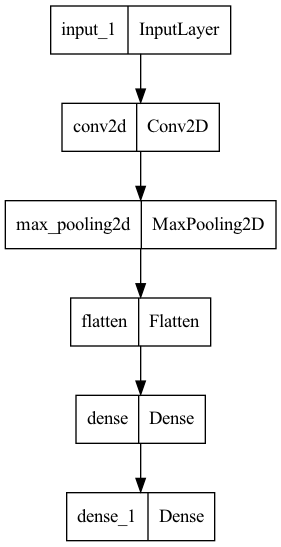

In [14]:
tf.keras.utils.plot_model(model)

In [15]:
model.summary

<bound method Model.summary of <keras.engine.functional.Functional object at 0x7ff253ef9580>>

**<font color='blue'>5. Compile the model using the correct loss, the Adam optimizer with a learning rate of 0.001 and the accuracy metric.**

In [ ]:

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              metrics=['accuracy'], loss=tf.keras.losses.SparseCategorical())

**<font color='blue'>6. Train the model for 10 epochs with a batch size of 64.**

*Tips: Don't forget to use the validation data and to save the output of the fit function.*

**<font color='blue'>7.a. Display the learning curves.**

**<font color='blue'>7.b. Evaluate the model on the test set and display the confusion matrix.**

**<font color='blue'>8.a. Choose and display an image from the dataset.**


Tensorflow model's layers can be accessed using the `.layers` attribute.<br> It returns a list of all the layers of the model.

```
layers = model.layers
```


**<font color='blue'>8.b. Extract the convolutional layer from the model and pass the image as an input.**

*Tips: Remember to reshape the image to a (instances, height, width, channel) shape.*

Assuming an **input of shape (batch_size, height, width, channels)** and a convolutional layer with filters number of filters, kernel_size size of filters, stride stride, and 'same' padding, the **output tensor will have a shape of (batch_size, height, width, filters)**.

If the inputs have the same size (height and width) and the same number of instance per batch (batch_size) then the individual filters can be accessed by indexing the filters dimension:

```
for i in range(n):
   output[:,:,:,i] # filter map n°i
```

**<font color='blue'>8.c. Display the 32 feature maps using the `imshow()` function.**

In [ ]:
fig, axes = plt.subplots()
for i in 

# Snapchat Review classification

In [16]:
# Snapchat dataset
snapchat_review = fetch_openml("Snapchat-Google-PlayStore-Reviews", version=1)['data']
snapchat_review = snapchat_review.drop(['Date', 'Helpful'], axis=1)
snapchat_review = snapchat_review.drop(snapchat_review[snapchat_review['Rating'] == 3].index, axis=0).reset_index(drop=True)
snapchat_review['Rating'] = snapchat_review['Rating'].transform(lambda x: "Positive" if x >= 4 else "Negative")

In [17]:
snapchat_review.head()

,Rating,Review_Text
0,Positive,Very Best camera and chat app
1,Positive,I love love love this app its its amazingly ea...
2,Negative,Broken joke of an app. Nothing else to it
3,Positive,One of the best texting a call apps out there
4,Negative,Have to download it again and again so that th...
